In [29]:
#데이터 불러오기
# 전처리한 데이터 불러오기
import pandas as pd

train_df = pd.read_csv('C://Users//and_c//Desktop//sparta_ga4//train_df3.csv', low_memory = False)
df = train_df.copy()

In [30]:
# 데이터프레임에 한 열의 값을 바꾸기 위해서 def함수를 만들고 apply 적용
import pandas as pd
import datetime #날짜와 시간을 다루는 라이브러리
import pytz #다양한 시간대를 처리하기 위해 사용하는 라이브러리

# Posix 시간을 utc 시간으로 변환하는 함수
def posix_to_utc(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime)
    return utc_time

# Posix 시간을 UTC 지정한 로컬 시간대로 변환하는 함수
def posix_to_utc_local(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime) #posix -> utc시간대로
    local_timezone = pytz.timezone('America/New_York')  # 지역 시간대
    return utc_time.astimezone(local_timezone) # 그 지역 시간대로 변환

In [31]:
df['visitStartTime'] = df['visitStartTime'].apply(posix_to_utc)

In [32]:
# date칼럼 추가
df['date'] = df['visitStartTime'].dt.date
# type time으로 변경
df['date'] = pd.to_datetime(df['date'])

In [58]:
# df 샘플링
df_2016 = df[(df['date'] > '2016-10-30') & (df['date'] < '2016-12-13')]

In [67]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155715 entries, 17695 to 784111
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   fullVisitorId              155715 non-null  object        
 1   channelGrouping            155715 non-null  object        
 2   visitStartTime             155715 non-null  datetime64[ns]
 3   device_browser             155715 non-null  object        
 4   device_operatingSystem     155715 non-null  object        
 5   device_deviceCategory      155715 non-null  object        
 6   geoNetwork_continent       155715 non-null  object        
 7   geoNetwork_subContinent    155715 non-null  object        
 8   geoNetwork_country         155715 non-null  object        
 9   totals_visits              155715 non-null  int64         
 10  totals_hits                155715 non-null  int64         
 11  totals_bounces             155715 non-null  floa

In [59]:
# week기준으로 구분한 칼럼 추가
df_2016['period_week'] = df_2016['visitStartTime'].dt.to_period('W').apply(lambda x: x.start_time.strftime('%Y-%m-%d'))

C:\Users\and_c\AppData\Local\Temp\ipykernel_12324\1184616719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['period_week'] = df_2016['visitStartTime'].dt.to_period('W').apply(lambda x: x.start_time.strftime('%Y-%m-%d'))


In [60]:
# user의 첫 방문날짜 칼럼 추가
df_2016['cohort_week'] = df_2016.groupby('fullVisitorId')['period_week'].transform('min')

C:\Users\and_c\AppData\Local\Temp\ipykernel_12324\1246611536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['cohort_week'] = df_2016.groupby('fullVisitorId')['period_week'].transform('min')


In [61]:
df_2016['period_week'] = pd.to_datetime(df_2016['period_week'])
df_2016['cohort_week'] = pd.to_datetime(df_2016['cohort_week'])

C:\Users\and_c\AppData\Local\Temp\ipykernel_12324\2630664070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['period_week'] = pd.to_datetime(df_2016['period_week'])
C:\Users\and_c\AppData\Local\Temp\ipykernel_12324\2630664070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['cohort_week'] = pd.to_datetime(df_2016['cohort_week'])


In [62]:
# Cohort_index 구하기 ...
df_2016['cohort_index'] = (df_2016['period_week'] - df_2016['cohort_week'])/7

C:\Users\and_c\AppData\Local\Temp\ipykernel_12324\3144535850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['cohort_index'] = (df_2016['period_week'] - df_2016['cohort_week'])/7


In [63]:
# cohort index 0 days에서 0 숫자만 추출
df_2016['cohort_index'] = df_2016['cohort_index'].dt.days

C:\Users\and_c\AppData\Local\Temp\ipykernel_12324\1133300477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['cohort_index'] = df_2016['cohort_index'].dt.days


In [64]:
# cohort에 따른 user수 구하기
cohort_table_2016 = df_2016.groupby(['cohort_week','cohort_index'])['fullVisitorId'].apply(pd.Series.nunique).reset_index()

In [65]:
cohort_table_2016

,cohort_week,cohort_index,fullVisitorId
0,2016-10-31,0,23160
1,2016-10-31,1,726
2,2016-10-31,2,527
3,2016-10-31,3,396
4,2016-10-31,4,401
5,2016-10-31,5,290
6,2016-10-31,6,50
7,2016-11-07,0,22592
8,2016-11-07,1,702
9,2016-11-07,2,395


In [66]:
# create Table
cohort_pivot_2016 = cohort_table_2016.pivot(index = 'cohort_week', columns=['cohort_index'], values='fullVisitorId')

In [54]:
# 각 기준이 되는 값(1열)으로 나눠주기
div_cohort_pivot_2016 = cohort_pivot_2016.divide(cohort_pivot_2016.iloc[:,0],axis=0)

Text(95.72222222222221, 0.5, 'visit')

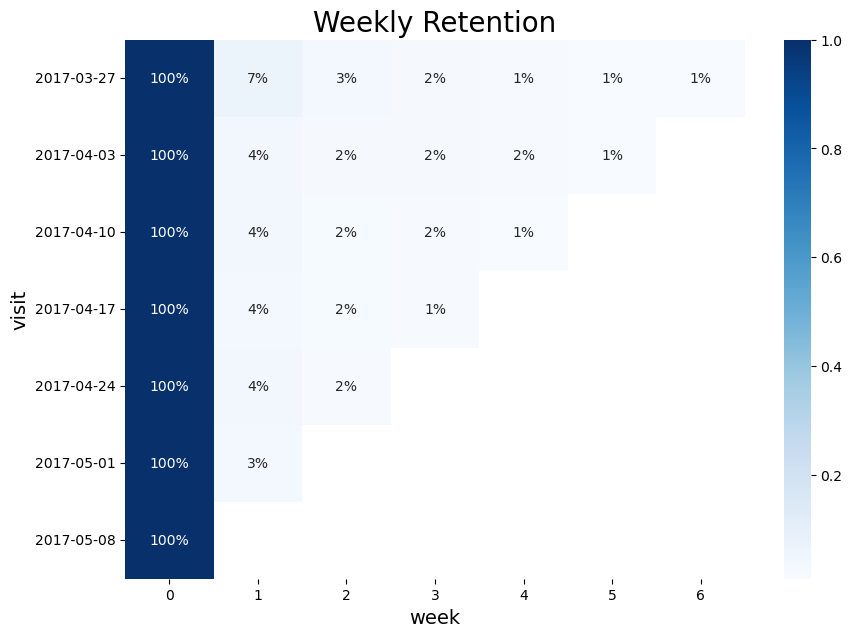

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# index 수정
div_cohort_pivot_2016.index = div_cohort_pivot_2016.index.strftime('%Y-%m-%d')

# heatmap
plt.figure(figsize=(10,7))
sns.heatmap(div_cohort_pivot_2016, annot = True, cmap='Blues',fmt = '.0%')
plt.title('Weekly Retention', fontsize=20)
plt.xlabel('week', fontsize=14)
plt.ylabel('visit', fontsize=14)